# Books Review Analysis

In [1]:
import re
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Set the download directory
download_path = 'nltk_data/'
nltk.data.path.append(download_path)


nltk.download('stopwords', download_dir=download_path)
nltk.download('wordnet', download_dir=download_path)

[nltk_data] Downloading package stopwords to nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# load reviews dataset
df = pd.read_csv("books_review_data.csv")

In [4]:
df.head()

,Unnamed: 0,user_id,book_id,title,description,authors,genres,rating,review_text
0,3,b6eb81c5d09dfe232397ced641e67993,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",4.0,"This one started off a little slow for me, but..."
1,4,5fc1ce83384da46a1bf7d1dedd667835,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",4.0,A very fun and warm story about friendship.
2,5,ea5552d66af8bc21751d8709312e995e,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",3.0,"I read this book just a bit over a year ago, a..."
3,6,8b7918e98865ad26e7d1145b27d92710,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",3.0,"Pretty good book, I liked it, although not as ..."
4,7,5b2eabd1f414f65a271c720f9ec8bc2a,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",2.0,"Book Bingo - June, July, August release. \n I'..."


## 1. Pre-processing

In [5]:
"""
    Remove \r and \n and replace by a space
"""
def replace_and_remove_by_space(string):
    replacements = {"\r": " ", "\n": " "}
    for old, new in replacements.items():
        string = string.replace(old, new)
    string = re.sub(r'\s+', ' ', string.strip())
    return string

In [6]:
"""
    Remove URLs
"""
def remove_urls(text):
    if isinstance(text, str):
        return re.sub(r'\bhttp\S+', '', text)
    return text

In [7]:
"""
    Remove emoji characters
"""
def remove_emoji_like_characters(text):
    return [re.sub(r'[^\x00-\x7F]', '', x) for x in text]

In [8]:
"""
    Remove \n, \r, and extra spaces
    Remove URLs if exists
    Remove emojis if exists
"""
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace \n, \r and remove extra spaces
    text = replace_and_remove_by_space(text)
    
    # Remove URLs
    text = remove_urls(text)
    
    # Remove emojis
    text = remove_emoji_like_characters(text)
    text = ''.join(text)
    
    return text

In [9]:
df.iloc[0]['review_text']

"This one started off a little slow for me, but I did get into it, and I really enjoyed it in the end. I didn't connect with Addie quite like I did Cannie in Good in Bed, but I did find her story compelling. And as someone with her own BFF, I could really relate to the history of their friendship, even if it was interrupted in the middle of it. \n Another winner from Jennifer Weiner!"

In [10]:
cleaned_text = preprocess_text(df.iloc[0]['review_text'])

In [11]:
cleaned_text

"this one started off a little slow for me, but i did get into it, and i really enjoyed it in the end. i didn't connect with addie quite like i did cannie in good in bed, but i did find her story compelling. and as someone with her own bff, i could really relate to the history of their friendship, even if it was interrupted in the middle of it. another winner from jennifer weiner!"

## 2. Lematize and Tokenizing

In [12]:
# init word lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
"""
    Tokenize texts
    Remove stop words
"""
def tokenize_text(text):
    stop_words = stopwords.words('english')

    # Remove punctuations and lowercase
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() or word.isspace()]

    # Remove stopwords and lemmatize 
    tokens = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Bigrams, Trigrams 
    bigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(tokens, min_count=5, threshold=100))
    trigram_mod = gensim.models.phrases.Phraser(gensim.models.Phrases(bigram_mod[tokens], threshold=100))

    return trigram_mod[bigram_mod[tokens]]

In [14]:
tokenize_text(cleaned_text)

['one',
 'started',
 'little',
 'slow',
 'get',
 'really',
 'enjoyed',
 'end',
 'connect',
 'addie',
 'quite',
 'like',
 'cannie',
 'good',
 'bed',
 'find',
 'story',
 'compelling',
 'someone',
 'bff',
 'could',
 'really',
 'relate',
 'history',
 'friendship',
 'even',
 'interrupted',
 'middle',
 'another',
 'winner',
 'jennifer',
 'weiner']

### Example

In [15]:
tokenize_text(preprocess_text(df.iloc[1]['review_text']))

['fun', 'warm', 'story', 'friendship']

In [16]:
tokenize_text(preprocess_text(df.iloc[100]['review_text']))

['novel',
 'fire',
 'okay',
 'really',
 'fire',
 'said',
 'fire',
 'effect',
 'woman',
 'liked',
 'nothing',
 'earth',
 'shattering',
 'still',
 'enjoyable',
 'feeling',
 'though',
 'easily',
 'forgotten']

## 3. LDA

### Book ID: 6066819

In [17]:
book_6066819 = df[df['book_id'] == 6066819]

In [18]:
book_6066819.head()

,Unnamed: 0,user_id,book_id,title,description,authors,genres,rating,review_text
0,3,b6eb81c5d09dfe232397ced641e67993,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",4.0,"This one started off a little slow for me, but..."
1,4,5fc1ce83384da46a1bf7d1dedd667835,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",4.0,A very fun and warm story about friendship.
2,5,ea5552d66af8bc21751d8709312e995e,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",3.0,"I read this book just a bit over a year ago, a..."
3,6,8b7918e98865ad26e7d1145b27d92710,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",3.0,"Pretty good book, I liked it, although not as ..."
4,7,5b2eabd1f414f65a271c720f9ec8bc2a,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",2.0,"Book Bingo - June, July, August release. \n I'..."


In [19]:
book_6066819.tail()

,Unnamed: 0,user_id,book_id,title,description,authors,genres,rating,review_text
35,38,b033ace5e31330b8ffd48b06bcff7639,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",3.0,"With friends like these, who needs Dolce and G..."
36,39,db16481f6458e27519ac164434bbc5b1,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",5.0,I love Jennifer Weiner. I love the way she tel...
37,40,f764ae9635e4cfe625184ec68e19e2a8,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",2.0,"I really like Jennifer Weiner, but there were ..."
38,41,54597a6a00b6e3a8f8a87d47e0905fac,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",1.0,Pretty much a waste of time.
39,42,fd40226f05728370d29891e41e35faef,6066819,Best Friends Forever,Addie Downs and Valerie Adler were eight when ...,"[{'author_id': '9212', 'role': ''}]","['fiction', 'romance', 'mystery', 'thriller', ...",1.0,I got board with this one and since I put it d...


In [20]:
book_6066819_reviews = book_6066819['review_text'].to_list()

In [21]:
print(f"Number of books reviews for 6066819 : {len(book_6066819_reviews)}")

Number of books reviews for 6066819 : 40


In [22]:
def preprocess_reviews(df):
    book_reviews = df['review_text']
    return [tokenize_text(preprocess_text(review)) for review in book_reviews]

In [23]:
# pre-processed book reviews
preprocessed_book_6066819 = preprocess_reviews(book_6066819)

In [24]:
dictionary = corpora.Dictionary(preprocessed_book_6066819)
corpus = [dictionary.doc2bow(text) for text in preprocessed_book_6066819]

In [32]:
"""
 Find optimal number of topics
"""
def find_optimal_topics(processed_data, dictionary, corpus):
    coherence_values = []
    model_list = []
    graph = []

    for num_topics in range(2, 6): # Test a range of topic numbers
        lda_model = gensim.models.LdaMulticore(
            corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100
        )
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        graph.append([num_topics, coherencemodel.get_coherence()])
        
    return model_list, coherence_values, graph

In [33]:
# Find optimal number of topics
model_list, coherence_values, graph = find_optimal_topics(preprocessed_book_6066819, dictionary, corpus)

In [34]:
print(coherence_values)

[0.30028803950715555, 0.2849000900792013, 0.3572894518623623, 0.37136923330686356]


In [35]:
print(graph)

[[2, 0.30028803950715555], [3, 0.2849000900792013], [4, 0.3572894518623623], [5, 0.37136923330686356]]


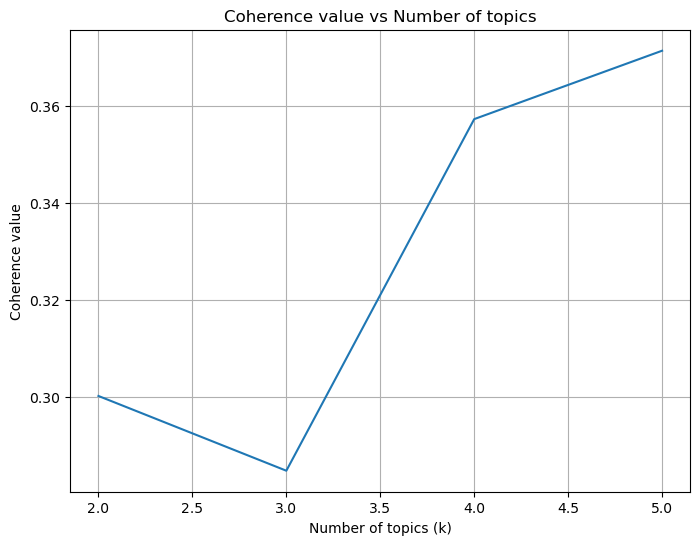

In [36]:
import matplotlib.pyplot as plt

num_topics = [x[0] for x in graph]
coherence_values = [x[1] for x in graph]

plt.figure(figsize=(8, 6))

plt.xlabel("Number of topics (k)")
plt.ylabel("Coherence value")
plt.title("Coherence value vs Number of topics")

plt.plot(num_topics, coherence_values)  # Plot the data

plt.grid(True)
plt.show()

In [37]:
# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]

In [38]:
"""
    List topics
"""
def list_topics(lda_model):
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx} \nWords: {topic}")

In [39]:
list_topics(optimal_model)

Topic: 0 
Words: 0.018*"book" + 0.013*"character" + 0.013*"addie" + 0.013*"story" + 0.012*"love" + 0.011*"valerie" + 0.011*"weiner" + 0.010*"still" + 0.009*"friend" + 0.009*"best"
Topic: 1 
Words: 0.024*"book" + 0.017*"one" + 0.017*"story" + 0.014*"really" + 0.013*"weiner" + 0.012*"addie" + 0.012*"read" + 0.011*"end" + 0.010*"character" + 0.009*"know"
Topic: 2 
Words: 0.018*"book" + 0.014*"read" + 0.008*"enjoyed" + 0.008*"better" + 0.008*"story" + 0.008*"weiner" + 0.007*"addie" + 0.007*"know" + 0.007*"home" + 0.006*"really"
Topic: 3 
Words: 0.034*"addie" + 0.034*"valerie" + 0.016*"book" + 0.015*"read" + 0.013*"friend" + 0.012*"weiner" + 0.011*"story" + 0.010*"good" + 0.010*"school" + 0.009*"really"
Topic: 4 
Words: 0.024*"story" + 0.021*"book" + 0.016*"like" + 0.010*"weiner" + 0.010*"one" + 0.010*"addie" + 0.010*"friend" + 0.010*"writing" + 0.009*"jennifer" + 0.008*"good"


In [40]:
for topic_id, topic in optimal_model.print_topics(-1):
    for word_prob_pair in topic.split(" + "):  
        prob, word = word_prob_pair.split("*")
        word = word.replace('"', '')  
        prob = float(prob)

        print(f"{word}, {prob}")
    print() 


book, 0.018
character, 0.013
addie, 0.013
story, 0.013
love, 0.012
valerie, 0.011
weiner, 0.011
still, 0.01
friend, 0.009
best, 0.009

book, 0.024
one, 0.017
story, 0.017
really, 0.014
weiner, 0.013
addie, 0.012
read, 0.012
end, 0.011
character, 0.01
know, 0.009

book, 0.018
read, 0.014
enjoyed, 0.008
better, 0.008
story, 0.008
weiner, 0.008
addie, 0.007
know, 0.007
home, 0.007
really, 0.006

addie, 0.034
valerie, 0.034
book, 0.016
read, 0.015
friend, 0.013
weiner, 0.012
story, 0.011
good, 0.01
school, 0.01
really, 0.009

story, 0.024
book, 0.021
like, 0.016
weiner, 0.01
one, 0.01
addie, 0.01
friend, 0.01
writing, 0.01
jennifer, 0.009
good, 0.008

